In [43]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Option Valuation Methods - Homework 2
### Andrei Stefan


## Exercise 1: Implied volatility

#### 1a)

In [44]:
data = pd.DataFrame({'Exercise Price': [5125,5225,5325,5425,5525, 5625,5725, 5825],'Option Price': [485,415,350,290.5,236,189.5,149,115],})
T = 4/12
r=0.05
t=0
S = 5420.3
data

,Exercise Price,Option Price
0,5125,485.0
1,5225,415.0
2,5325,350.0
3,5425,290.5
4,5525,236.0
5,5625,189.5
6,5725,149.0
7,5825,115.0


In [45]:
def put_call_value(S, E, r, tau, sigma, option_type='call'):
    """
    Calculate the value of a call or put option using the Black-Scholes formula.
    :param S: Asset price at time t
    :param E: Exercise price
    :param r: interest rate
    :param tau: time to expiry (T-t)
    :param sigma: volatility
    :param option_type: 'call' or 'put'
    :return: option value, delta, and vega
    """
    if tau > 0:
        d1 = (np.log(S / E) + (r + sigma ** 2 / 2) * tau) / (sigma * np.sqrt(tau))
        d2 = d1 - sigma * np.sqrt(tau)
        if option_type == 'call':
            value = S * stats.norm.cdf(d1) - E * np.exp(-r * tau) * stats.norm.cdf(d2)
            delta= stats.norm.cdf(d1)
            vega = S * np.sqrt(tau) * np.exp(-d1 ** 2 / 2) / np.sqrt(2 * np.pi)
        else:
            value = E * np.exp(-r * tau) * stats.norm.cdf(-d2) - S * stats.norm.cdf(-d1)
            delta = -stats.norm.cdf(-d1)
            vega = S * np.sqrt(tau) * np.exp(-d1 ** 2 / 2) / np.sqrt(2 * np.pi)
        return value, delta, vega
    else:
        if option_type == 'call':
            return max(S - E, 0), 1 if S > E else 0,0
        else:
            return max(E - S, 0), -1 if S < E else 0,0

In [46]:
def newtons_method_volatility(S, E, r, tau, C_true, tol=1e-6, max_iter=1000):
    """
    Calculate the implied volatility of an option using Newton's method.
    :param S: Asset price at time t
    :param E:  Exercise price
    :param r: interest rate
    :param tau: time to expiry (T-t)
    :param C_true: true option price
    :param tol: tolerance
    :param max_iter: maximum number of iterations
    :return: implied volatility
    """
    # initial guess for volatility
    sigmahat = np.sqrt(2*abs(np.log(S/E) + r*tau) / tau)

    sigma = sigmahat
    sigmadiff = 1
    k=1
    while sigmadiff >= tol and k < max_iter:
        C, delta, vega = put_call_value(S, E, r, tau, sigma)
        increment = (C-C_true)/vega
        if vega == 0:
            return sigma
        sigma = sigma - increment
        sigmadiff = abs(increment)
        k += 1
    return sigma

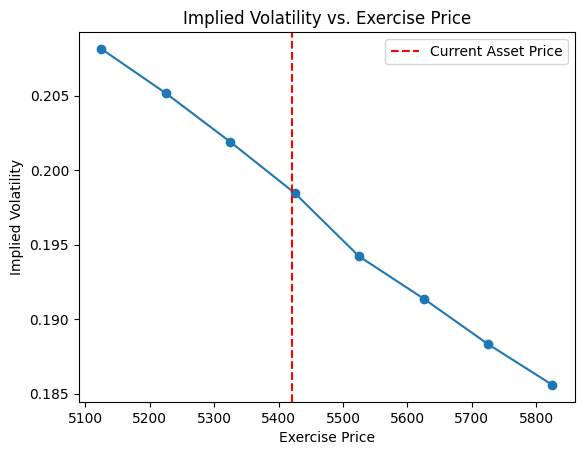

In [47]:
imp_volatilities = []
for i in range(len(data)):
    E = data['Exercise Price'][i]
    C_true = data['Option Price'][i]
    #call_BS = put_call_value(S, E, r, T, 0.2, option_type='call')
    #print(call_BS)
    implied_volatility = newtons_method_volatility(S, E, r, T, C_true)
    imp_volatilities.append(implied_volatility)

# print(imp_volatilities)

plt.plot(data['Exercise Price'], imp_volatilities, 'o-')
# vertical line with the current asset price S
plt.axvline(x=S, color='r', linestyle='--', label='Current Asset Price')

plt.xlabel('Exercise Price')
plt.ylabel('Implied Volatility')
plt.title('Implied Volatility vs. Exercise Price')
plt.legend()
plt.show()

#### 1b)

A for `$AAPL`

##### 1. fetching data

In [48]:
AAPL_17_01 = pd.read_csv('data/aapl-options-exp-2025-01-17.csv')
AAPL_24_01 = pd.read_csv('data/aapl-options-exp-2025-01-24.csv')
print(AAPL_17_01.head())
print(AAPL_24_01.head())

   Strike Moneyness    Bid    Mid    Ask   Last Change     %Chg Volume  \
0  212.50   +10.28%  24.25  24.93  25.60  24.95  -5.18  -17.19%     41   
1  215.00    +9.23%  21.90  22.23  22.55  21.35  -6.30  -22.78%    220   
2  217.50    +8.17%  18.75  19.75  20.75  25.34   unch     unch      0   
3  220.00    +7.11%  17.00  17.30  17.60  17.30  -5.85  -25.27%  1,667   
4  222.50    +6.06%  14.35  15.05  15.75  14.30  -6.55  -31.41%     48   

  Open Int OI Chg    Delta      IV  Type Last Trade  
0        1     +1  0.93882  56.39%  Call   01/10/25  
1   23,386    -45  0.95776  44.77%  Call   01/10/25  
2        4     +4  0.95075  41.18%  Call   01/08/25  
3   36,713    -48  0.93910  38.12%  Call   01/10/25  
4       40    +15  0.90178  38.87%  Call   01/10/25  
   Strike Moneyness    Bid    Mid    Ask   Last Change     %Chg Volume  \
0  212.50   +10.28%  23.05  24.90  26.75  25.50   unch     unch      2   
1  215.00    +9.23%  22.10  22.78  23.45  22.80  -4.78  -17.33%     17   
2  217.50

In [49]:
# drop rows with put values
AAPL_calls_17_01 = AAPL_17_01[AAPL_17_01['Type'] == 'Call']
AAPL_calls_24_01 = AAPL_24_01[AAPL_24_01['Type'] == 'Call']
AAPL_calls_17_01.head()

,Strike,Moneyness,Bid,Mid,Ask,Last,Change,%Chg,Volume,Open Int,OI Chg,Delta,IV,Type,Last Trade
0,212.50,+10.28%,24.25,24.93,25.60,24.95,-5.18,-17.19%,41,1,+1,0.93882,56.39%,Call,01/10/25
1,215.00,+9.23%,21.90,22.23,22.55,21.35,-6.30,-22.78%,220,"23,386",-45,0.95776,44.77%,Call,01/10/25
2,217.50,+8.17%,18.75,19.75,20.75,25.34,unch,unch,0,4,+4,0.95075,41.18%,Call,01/08/25
3,220.00,+7.11%,17.00,17.30,17.60,17.30,-5.85,-25.27%,"1,667","36,713",-48,0.93910,38.12%,Call,01/10/25
4,222.50,+6.06%,14.35,15.05,15.75,14.30,-6.55,-31.41%,48,40,+15,0.90178,38.87%,Call,01/10/25


##### 2. predefine useful functions

In [50]:
from scipy.interpolate import CubicSpline

def rfrate(T_option):
    """
    Calculate the risk-free rate for a given option maturity using a cubic spline interpolation.
    :param T_option: option time to maturity (w.r.t. 10th January 2025) (in years)
    :return: risk-free rate
    """
    maturities = np.array([1/12,1/6,1/4,1/3,1/2,1,2,3,5,7,10,20,30])  # years
    yields = np.array([4.42,4.35,4.36,4.33,4.27,4.25,4.40,4.46,4.59,4.70,4.77,5.04,4.96 ])
    # sourced from treasury.gov @ 2025-01-10
    spline = CubicSpline(maturities, yields)
    risk_free_rate = spline(T_option)
    return risk_free_rate

#### 1c)

## Exercise 2: Binomial method

In [85]:
### Parameters ###
# American Put Option
S0 = 9
T = 1
r = 0.06
sigma = 0.3
E = 10
##################

In [110]:
def binomial_method_american_put(S0, E, r, T, sigma, M):
    """
    Calculate the value of an American put option using the binomial method.
    :param S0: initial asset price
    :param E: exercise price
    :param r: interest rate
    :param T: time to maturity
    :param sigma: volatility
    :param M: number of time steps
    :return: option value
    """
    dt = T / M
    u = np.exp(sigma * np.sqrt(dt) + (r-0.5*sigma**2) * dt)
    d = np.exp(-sigma * np.sqrt(dt) + (r-0.5*sigma**2) * dt)
    p = (np.exp(r * dt) - d) / (u - d)

    # Compute stock price tree
    dpowers = d ** np.arange(start=M, stop=-1, step=-1)
    upowers = u ** np.arange(start=0, stop=M + 1, step=1)
    S = S0 * dpowers * upowers

    # Initialize option payoff at maturity
    W = np.maximum(E - S, 0)
    exercise_boundary = []
    # Perform backward induction
    for i in range(M, 0, -1):
        Si = S0 * dpowers[M - i + 1:M + 1] * upowers[:i]
        continuation_value = np.exp(-r * dt) * (p * W[1:i + 1] + (1 - p) * W[:i])
        exercise_value = E - Si
        # Update option value with early exercise consideration
        W = np.maximum(exercise_value, continuation_value)

        # Determine the exercise boundary (maximum stock price where early exercise occurs)
        boundary_price = np.max(Si[exercise_value > continuation_value]) if np.any(exercise_value > continuation_value) else np.nan
        exercise_boundary.append(boundary_price)

    return [W[0], exercise_boundary]

In [106]:
# Fig 18.1
# ms = np.arange(200,800,1)
# S0 = 9
# T = 1
# r = 0.06
# sigma = 0.3
# E = 10
# put_values = []
# for m in ms:
#     put_values.append(binomial_method_american_put(S0, E, r, T, sigma, m)[0])
#
# plt.plot(ms, put_values, 'x')
# plt.xlabel('Number of Time Steps')
# plt.ylabel('Option Value')
# plt.title('Option Value vs. Number of Time Steps')
# plt.show()
# print(put_values)

In [107]:
# Fig 18.3
# T = 1
# r = 0.06
# sigma = 0.3
# E = 10
#
# M =100
# S0s = np.arange(0, 20, 0.2)
# put_values = []
# for S0 in S0s:
#     put_values.append(binomial_method_american_put(S0, E, r, T, sigma, M))
# hockey = np.maximum(E-S0s,0)
# plt.plot(S0s, put_values, '-')
# plt.plot(S0s, hockey, 'r--', label='Hockey Stick')
# plt.xlabel('Initial Asset Price')
# plt.ylabel('Option Value')
# plt.title('Option Value vs. Initial Asset Price')
# plt.legend()
# plt.show()

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 7.102371574305725, 7.035416690301834, 7.102584648649055, 7.035627755968512, 7.10279772938471, 7.0358388279672575, 7.103010816512884, 7.036049906298257, 7.103223910033766, 7.036260990961699, 7.103437009947551, 7.036472081957778, 7.103650116254427, 7.036683179286681, 7.103863228954591, 7.0368942829486, 7.10407634804823, 7.037105392943722, 7.104289473535539, 7.037316509272241, 7.104502605416709, 7.037527631934346, 7.104715743691931, 7.037738760930223, 7.104928888361396, 7.0379498962600655, 7.105142039425297, 7.038161037924063, 7.105355196883826, 7.038372185922405, 7.105568360737175, 7.0385833402552835, 7.105781530985537, 7.0387945009228865, 7.1059947076291, 7.039005667925402, 7.106207890668058, 7.039216841263025, 7.106421080102605, 7.0394280209359446, 7.106634275932932, 7.039639206944346, 7.106847478159227, 7.039850399288426, 7.107060686781686, 7.040061597968369, 7

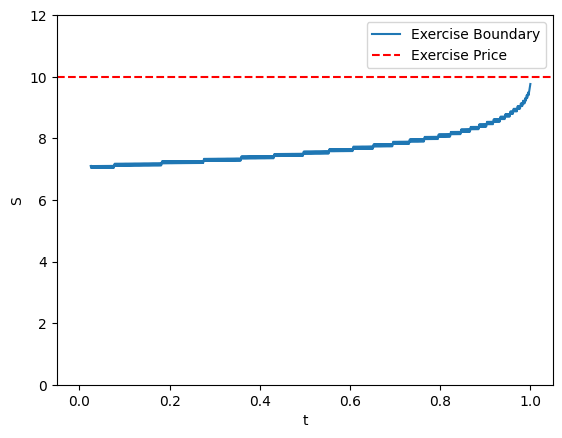

In [121]:
# Fig 18.4
S0=9
T = 1
r = 0.06
sigma = 0.3
E = 10
M = 1000
x = binomial_method_american_put(S0, E, r, T, sigma, M)
boundary = x[1][::-1]
print(boundary)
plt.plot(np.linspace(0, T , M), boundary, linestyle='-',label='Exercise Boundary')
plt.ylim(0, 12)
plt.axline((0, E), slope=0, color='r', linestyle='--', label='Exercise Price')
plt.xlabel('t')
plt.ylabel('S')
plt.legend()
plt.show()